In [1]:
from simpful import *

## Example code: Tipping problem
source: https://www.researchgate.net/publication/346395808_Simpful_A_User-Friendly_Python_Library_for_Fuzzy_Logic

In [2]:
# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term='poor')
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term='good')
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term='excellent')
FS.add_linguistic_variable('Service', LinguisticVariable([S_1, S_2, S_3], concept='Service quality', universe_of_discourse=[0,10]))

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term='rancid')
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term='delicious')
FS.add_linguistic_variable('Food', LinguisticVariable([F_1, F_2], concept='Food quality', universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term='small')
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term='average')
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term='generous')
FS.add_linguistic_variable('Tip', LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

# Define fuzzy rules
R1 = 'IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)'
R2 = 'IF (Service IS good) THEN (Tip IS average)'
R3 = 'IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)'
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable('Service', 4)
FS.set_variable('Food', 8)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(['Tip']))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Tip': 14.17223614042091}


## Mamdani

In [3]:

FS_m1 = FuzzySystem()

#mean delay:
D1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.1, d=0.3), term='VS')
D2 = FuzzySet(function=Triangular_MF(a=0.1, b=0.3, c=0.5), term='S')
D3 = FuzzySet(function=Trapezoidal_MF(a=0.4, b=0.6, c=0.7, d=0.7), term='M')
FS_m1.add_linguistic_variable('mean_delay', LinguisticVariable([D1, D2, D3], concept='Mean delay', universe_of_discourse=[0,0.7]))
#FS_m1.plot_variable("mean_delay")


#number of servers:
S1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.35), term='S')
S2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term='M')
S3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term='L')
FS_m1.add_linguistic_variable('servers', LinguisticVariable([S1, S2, S3], concept='Number of servers', universe_of_discourse=[0,1]))
#FS_m1.plot_variable("servers")

#repair utilisation factor:
R1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.4, d=0.6), term='L')
R2 = FuzzySet(function=Triangular_MF(a=0.4, b=0.6, c=0.8), term='M')
R3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term='H')
FS_m1.add_linguistic_variable('utilisation_factor', LinguisticVariable([R1, R2, R3], concept='Repair utilisation factor', universe_of_discourse=[0,1]))
#FS_m1.plot_variable("utilisation_factor")


#output - number of spares:
O1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.1, d=0.3), term='VS')
O2 = FuzzySet(function=Triangular_MF(a=0, b=0.2, c=0.4), term='S')
O3 = FuzzySet(function=Triangular_MF(a=0.25, b=0.35, c=0.45), term='RS')
O4 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term='M')
O5 = FuzzySet(function=Triangular_MF(a=0.55, b=0.65, c=0.75), term='RL')
O6 = FuzzySet(function=Triangular_MF(a=0.6, b=0.8, c=1), term='L')
O7 = FuzzySet(function=Trapezoidal_MF(a=0.7, b=0.9, c=1, d=1), term='VS')
FS_m1.add_linguistic_variable('spares', LinguisticVariable([O1, O2, O3, O4, O5, O6, O7], universe_of_discourse=[0,1]))
#FS_m1.plot_variable("spares")



  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



### Rule base 1

In [4]:
R1_1 = 'IF (utilisation_factor IS L) THEN (spares IS S)'
R1_2 = 'IF (utilisation_factor IS M) THEN (spares IS M)'
R1_3 = 'IF (utilisation_factor IS H) THEN (spares IS L)'

R1_4 = 'IF (mean_delay IS VS) AND (servers IS S) THEN (spares IS VL)'
R1_5 = 'IF (mean_delay IS S) AND (servers IS S) THEN (spares IS L)'
R1_6 = 'IF (mean_delay IS M) AND (servers IS S) THEN (spares IS M)'

R1_7 = 'IF (mean_delay IS VS) AND (servers IS M) THEN (spares IS RL)'
R1_8 = 'IF (mean_delay IS S) AND (servers IS M) THEN (spares IS RS)'
R1_9 = 'IF (mean_delay IS M) AND (servers IS M) THEN (spares IS S)'

R1_10 = 'IF (mean_delay IS VS) AND (servers IS L) THEN (spares IS M)'
R1_11 = 'IF (mean_delay IS VS) AND (servers IS L) THEN (spares IS S)'
R1_12 = 'IF (mean_delay IS VS) AND (servers IS L) THEN (spares IS VS)'

FS_m1.add_rules([R1_1, R1_2, R1_3, R1_4, R1_5, R1_6, R1_7, R1_8, R1_9, R1_10, R1_11, R1_12])

Testing output:

In [5]:
# Set antecedents values
FS_m1.set_variable('mean_delay', 0.5)
FS_m1.set_variable('servers', 0.5)
FS_m1.set_variable('utilisation_factor', 0.5)
print(FS_m1.Mamdani_inference(['spares']))

{'spares': 0.3500003009021046}


In [7]:

import matplotlib.pylab as plt
from numpy import linspace, array
from mpl_toolkits.mplot3d import Axes3D

# Plotting surface
xs = []
ys = []
ws = []
zs = []
DIVs = 10
for x in linspace(0,0.7,DIVs):
    for y in linspace(0,1,DIVs):
        for w in linspace(0,1,DIVs):
            FS_m1.set_variable("mean_delay", x)
            FS_m1.set_variable("servers", y)
            FS_m1.set_variable("utilisation_factor", w)
            z = FS_m1.Mamdani_inference()['spares']
            xs.append(x)
            ys.append(y)
            ws.append(w)
            zs.append(z)
        
        
xs = array(xs)
ys = array(ys)
ws = array(ws)
zs = array(zs)



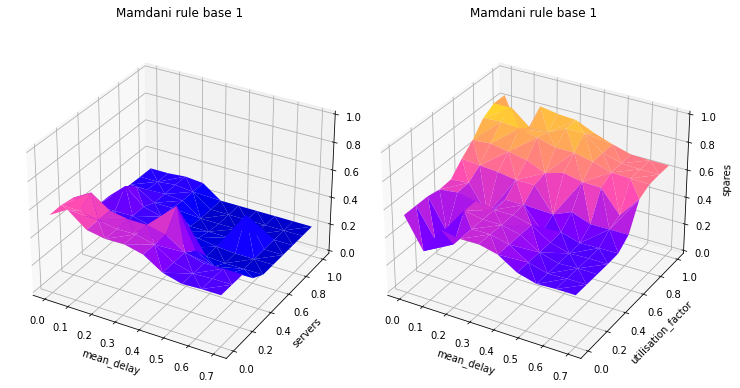

In [8]:
fig = plt.figure()
fig.set_size_inches(10, 20)

ax = fig.add_subplot(121, projection='3d')

xx, yy = plt.meshgrid(xs,ys)

ax.plot_trisurf(xs,ys,zs, vmin=0, vmax=1, cmap='gnuplot2')
ax.set_xlabel("mean_delay")
ax.set_ylabel("servers")
ax.set_zlabel("spares")
ax.set_title("Mamdani rule base 1", pad=20)
ax.set_zlim(0, 1)
plt.tight_layout()

bx = fig.add_subplot(122, projection='3d')

xx, yy = plt.meshgrid(xs,ws)

bx.plot_trisurf(xs,ws,zs, vmin=0, vmax=1, cmap='gnuplot2')
bx.set_xlabel("mean_delay")
bx.set_ylabel("utilisation_factor")
bx.set_zlabel("spares")
bx.set_title("Mamdani rule base 1", pad=20)
bx.set_zlim(0, 1)
plt.tight_layout()

plt.show()

### Rule base 2

In [21]:
FS_m2 = FuzzySystem()

#mean delay:
D1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.1, d=0.3), term='VS')
D2 = FuzzySet(function=Triangular_MF(a=0.1, b=0.3, c=0.5), term='S')
D3 = FuzzySet(function=Trapezoidal_MF(a=0.4, b=0.6, c=0.7, d=0.7), term='M')
FS_m2.add_linguistic_variable('mean_delay', LinguisticVariable([D1, D2, D3], concept='Mean delay', universe_of_discourse=[0,0.7]))
FS_m2.plot_variable("mean_delay")


#number of servers:
S1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.35), term='S')
S2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term='M')
S3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term='L')
FS_m2.add_linguistic_variable('servers', LinguisticVariable([S1, S2, S3], concept='Number of servers', universe_of_discourse=[0,1]))
#FS_m2.plot_variable("servers")

#repair utilisation factor:
R1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.4, d=0.6), term='L')
R2 = FuzzySet(function=Triangular_MF(a=0.4, b=0.6, c=0.8), term='M')
R3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term='H')
FS_m2.add_linguistic_variable('utilisation_factor', LinguisticVariable([R1, R2, R3], concept='Repair utilisation factor', universe_of_discourse=[0,1]))
#FS_m2.plot_variable("utilisation_factor")


#output - number of spares:
O1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.1, d=0.3), term='VS')
O2 = FuzzySet(function=Triangular_MF(a=0, b=0.2, c=0.4), term='S')
O3 = FuzzySet(function=Triangular_MF(a=0.25, b=0.35, c=0.45), term='RS')
O4 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term='M')
O5 = FuzzySet(function=Triangular_MF(a=0.55, b=0.65, c=0.75), term='RL')
O6 = FuzzySet(function=Triangular_MF(a=0.6, b=0.8, c=1), term='L')
O7 = FuzzySet(function=Trapezoidal_MF(a=0.7, b=0.9, c=1, d=1), term='VS')
FS_m2.add_linguistic_variable('spares', LinguisticVariable([O1, O2, O3, O4, O5, O6, O7], universe_of_discourse=[0,1]))
#FS_m2.plot_variable("spares")

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [22]:
R2_1 = 'IF (mean_delay IS VS) AND (servers IS S) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_2 = 'IF (mean_delay IS S) AND (servers IS S) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_3 = 'IF (mean_delay IS M) AND (servers IS S) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_4 = 'IF (mean_delay IS VS) AND (servers IS M) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_5 = 'IF (mean_delay IS S) AND (servers IS M) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_6 = 'IF (mean_delay IS M) AND (servers IS M) AND (utilisation_factor IS L) THEN (spares IS VS)'
R2_7 = 'IF (mean_delay IS VS) AND (servers IS L) AND (utilisation_factor IS L) THEN (spares IS S)'
R2_8 = 'IF (mean_delay IS S) AND (servers IS L) AND (utilisation_factor IS L) THEN (spares IS S)'
R2_9 = 'IF (mean_delay IS M) AND (servers IS L) AND (utilisation_factor IS L) THEN (spares IS VS)'

R2_10 = 'IF (mean_delay IS VS) AND (servers IS S) AND (utilisation_factor IS M) THEN (spares IS S)'
R2_11 = 'IF (mean_delay IS VS) AND (servers IS S) AND (utilisation_factor IS M) THEN (spares IS VS)'
R2_12 = 'IF (mean_delay IS S) AND (servers IS S) AND (utilisation_factor IS M) THEN (spares IS VS)'
R2_13 = 'IF (mean_delay IS M) AND (servers IS S) AND (utilisation_factor IS M) THEN (spares IS RS)'
R2_14 = 'IF (mean_delay IS VS) AND (servers IS M) AND (utilisation_factor IS M) THEN (spares IS S)'
R2_15 = 'IF (mean_delay IS S) AND (servers IS M) AND (utilisation_factor IS M) THEN (spares IS VS)'
R2_16 = 'IF (mean_delay IS M) AND (servers IS M) AND (utilisation_factor IS M) THEN (spares IS M)'
R2_17 = 'IF (mean_delay IS VS) AND (servers IS L) AND (utilisation_factor IS M) THEN (spares IS RS)'
R2_18 = 'IF (mean_delay IS S) AND (servers IS L) AND (utilisation_factor IS M) THEN (spares IS S)'

R2_19 = 'IF (mean_delay IS VS) AND (servers IS S) AND (utilisation_factor IS H) THEN (spares IS VL)'
R2_20 = 'IF (mean_delay IS S) AND (servers IS S) AND (utilisation_factor IS H) THEN (spares IS L)'
R2_21 = 'IF (mean_delay IS M) AND (servers IS S) AND (utilisation_factor IS H) THEN (spares IS M)'
R2_22 = 'IF (mean_delay IS VS) AND (servers IS M) AND (utilisation_factor IS H) THEN (spares IS M)'
R2_23 = 'IF (mean_delay IS S) AND (servers IS M) AND (utilisation_factor IS H) THEN (spares IS M)'
R2_24 = 'IF (mean_delay IS M) AND (servers IS M) AND (utilisation_factor IS H) THEN (spares IS S)'
R2_25 = 'IF (mean_delay IS VS) AND (servers IS L) AND (utilisation_factor IS H) THEN (spares IS RL)'
R2_26 = 'IF (mean_delay IS S) AND (servers IS L) AND (utilisation_factor IS H) THEN (spares IS M)'
R2_27 = 'IF (mean_delay IS M) AND (servers IS L) AND (utilisation_factor IS H) THEN (spares IS RS)'

FS_m2.add_rules([R2_1, R2_2, R2_3, R2_4, R2_5, R2_6, R2_7, R2_8, R2_9, R2_10, R2_11, R2_12, R2_13, R2_14, R2_15, R2_16, R2_17, R2_18, R2_19, R2_20, R2_21, R2_22, R2_23, R2_24, R2_25, R2_26, R2_27])



In [26]:
# Perform Mamdani inference and print output

FS_m2.set_variable('mean_delay', 0.5)
FS_m2.set_variable('servers', 0.5)
FS_m2.set_variable('utilisation_factor', 0.5)
print(FS_m2.Mamdani_inference(['spares']))


{'spares': 0.3300024633297296}


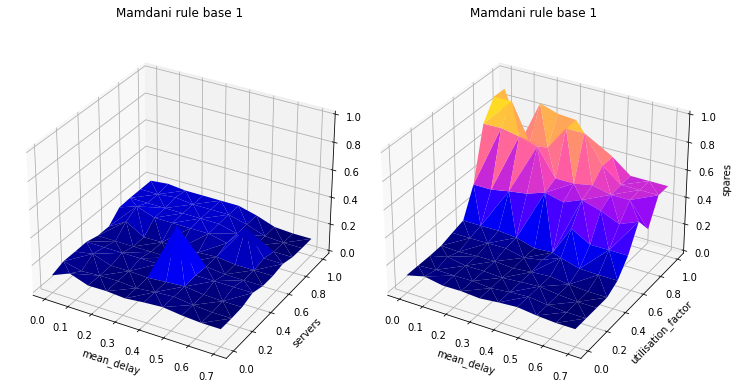

In [44]:
# Plotting surface
xs = []
ys = []
ws = []
zs = []
DIVs = 10
for x in linspace(0,0.7,DIVs):
    for y in linspace(0,1,DIVs):
        for w in linspace(0,1,DIVs):
            FS_m2.set_variable("mean_delay", x)
            FS_m2.set_variable("servers", y)
            FS_m2.set_variable("utilisation_factor", w)
            z = FS_m2.Mamdani_inference()['spares']
            xs.append(x)
            ys.append(y)
            ws.append(w)
            zs.append(z)
        
        
xs = array(xs)
ys = array(ys)
ws = array(ws)
zs = array(zs)

fig = plt.figure()
fig.set_size_inches(10, 20)

ax = fig.add_subplot(121, projection='3d')

xx, yy = plt.meshgrid(xs,ys)

ax.plot_trisurf(xs,ys,zs, vmin=0, vmax=1, cmap='gnuplot2')
ax.set_xlabel("mean_delay")
ax.set_ylabel("servers")
ax.set_zlabel("spares")
ax.set_title("Mamdani rule base 1", pad=20)
ax.set_zlim(0, 1)
plt.tight_layout()

bx = fig.add_subplot(122, projection='3d')

xx, yy = plt.meshgrid(xs,ws)

bx.plot_trisurf(xs,ws,zs, vmin=0, vmax=1, cmap='gnuplot2')
bx.set_xlabel("mean_delay")
bx.set_ylabel("utilisation_factor")
bx.set_zlabel("spares")
bx.set_title("Mamdani rule base 2", pad=20)
bx.set_zlim(0, 1)
plt.tight_layout()

plt.show()

# Sugeno

In [35]:
FS_s1 = FuzzySystem()

#mean delay:
D1 = FuzzySet(points=[[0.,1.],[0.1, 1.],[0.3, 0.]], term='VS')
D2 = FuzzySet(points=[[0.1,0.],[0.3,1.],[0.5,0.]], term='S')
D3 = FuzzySet(points=[[0.4,0.],[0.6,1.],[0.7,1.]], term='M')
FS_s1.add_linguistic_variable('mean_delay', LinguisticVariable([D1, D2, D3], concept='Mean delay', universe_of_discourse=[0,0.7]))
#FS_s1.plot_variable("mean_delay")


#number of servers:
S1 = FuzzySet(points=[[0.,1.],[0.2, 1.],[0.35, 0.]], term='S')
S2 = FuzzySet(points=[[0.3,0.],[0.5, 1.],[0.7, 0.]], term='M')
S3 = FuzzySet(points=[[0.6,0.],[0.8, 1.],[1., 1.]], term='L')
FS_s1.add_linguistic_variable('servers', LinguisticVariable([S1, S2, S3], concept='Number of servers', universe_of_discourse=[0,1]))
#FS_s1.plot_variable("servers")

#repair utilisation factor:
R1 = FuzzySet(points=[[0.,1.],[0.4, 1.],[0.6, 0.]], term='L')
R2 = FuzzySet(points=[[0.4,0.],[0.6, 1.],[0.8, 0.]], term='M')
R3 = FuzzySet(points=[[0.6,0.],[0.8, 1.],[1., 1.]], term='H')
FS_s1.add_linguistic_variable('utilisation_factor', LinguisticVariable([R1, R2, R3], concept='Repair utilisation factor', universe_of_discourse=[0,1]))
#FS_s1.plot_variable("utilisation_factor")

#output
FS_s1.set_crisp_output_value("VS",0.1)
FS_s1.set_crisp_output_value("S",0.2)
FS_s1.set_crisp_output_value("RS",0.35)
FS_s1.set_crisp_output_value("M",0.5)
FS_s1.set_crisp_output_value("RL",0.65)
FS_s1.set_crisp_output_value("L",0.8)
FS_s1.set_crisp_output_value("VL",0.9)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


### Rule base 1

In [38]:

FS_s1.add_rules([R1_1, R1_2, R1_3, R1_4, R1_5, R1_6, R1_7, R1_8, R1_9, R1_10, R1_11, R1_12])

In [39]:
FS_s1.set_variable('mean_delay', 0.5)
FS_s1.set_variable('servers', 0.5)
FS_s1.set_variable('utilisation_factor', 0.5)
print(FS_s1.Sugeno_inference(["spares"]))

{'spares': 0.3}


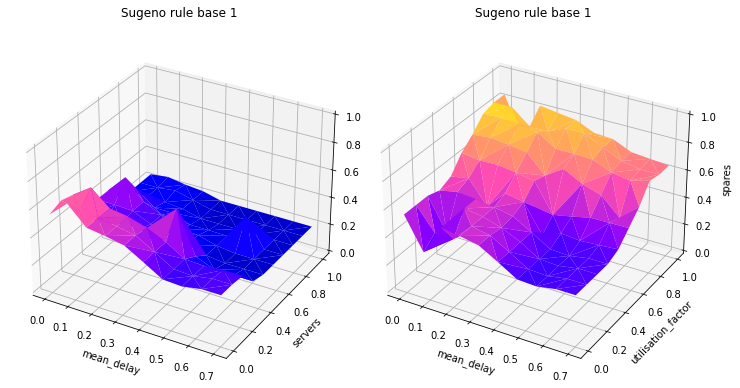

In [47]:
# Plotting surface
xs = []
ys = []
ws = []
zs = []
DIVs = 10
for x in linspace(0,0.7,DIVs):
    for y in linspace(0,1,DIVs):
        for w in linspace(0,1,DIVs):
            FS_s1.set_variable("mean_delay", x)
            FS_s1.set_variable("servers", y)
            FS_s1.set_variable("utilisation_factor", w)
            z = FS_s1.Sugeno_inference()['spares']
            xs.append(x)
            ys.append(y)
            ws.append(w)
            zs.append(z)
        
        
xs = array(xs)
ys = array(ys)
ws = array(ws)
zs = array(zs)

fig = plt.figure()
fig.set_size_inches(10, 20)

ax = fig.add_subplot(121, projection='3d')

xx, yy = plt.meshgrid(xs,ys)

ax.plot_trisurf(xs,ys,zs, vmin=0, vmax=1, cmap='gnuplot2')
ax.set_xlabel("mean_delay")
ax.set_ylabel("servers")
ax.set_zlabel("spares")
ax.set_title("Sugeno rule base 1", pad=20)
ax.set_zlim(0, 1)
plt.tight_layout()

bx = fig.add_subplot(122, projection='3d')

xx, yy = plt.meshgrid(xs,ws)

bx.plot_trisurf(xs,ws,zs, vmin=0, vmax=1, cmap='gnuplot2')
bx.set_xlabel("mean_delay")
bx.set_ylabel("utilisation_factor")
bx.set_zlabel("spares")
bx.set_title("Sugeno rule base 1", pad=20)
bx.set_zlim(0, 1)
plt.tight_layout()

plt.show()

### Rule base 2

In [41]:
FS_s2 = FuzzySystem()

#mean delay:
D1 = FuzzySet(points=[[0.,1.],[0.1, 1.],[0.3, 0.]], term='VS')
D2 = FuzzySet(points=[[0.1,0.],[0.3,1.],[0.5,0.]], term='S')
D3 = FuzzySet(points=[[0.4,0.],[0.6,1.],[0.7,1.]], term='M')
FS_s2.add_linguistic_variable('mean_delay', LinguisticVariable([D1, D2, D3], concept='Mean delay', universe_of_discourse=[0,0.7]))
#FS_s2.plot_variable("mean_delay")


#number of servers:
S1 = FuzzySet(points=[[0.,1.],[0.2, 1.],[0.35, 0.]], term='S')
S2 = FuzzySet(points=[[0.3,0.],[0.5, 1.],[0.7, 0.]], term='M')
S3 = FuzzySet(points=[[0.6,0.],[0.8, 1.],[1., 1.]], term='L')
FS_s2.add_linguistic_variable('servers', LinguisticVariable([S1, S2, S3], concept='Number of servers', universe_of_discourse=[0,1]))
#FS_s2.plot_variable("servers")

#repair utilisation factor:
R1 = FuzzySet(points=[[0.,1.],[0.4, 1.],[0.6, 0.]], term='L')
R2 = FuzzySet(points=[[0.4,0.],[0.6, 1.],[0.8, 0.]], term='M')
R3 = FuzzySet(points=[[0.6,0.],[0.8, 1.],[1., 1.]], term='H')
FS_s2.add_linguistic_variable('utilisation_factor', LinguisticVariable([R1, R2, R3], concept='Repair utilisation factor', universe_of_discourse=[0,1]))
#FS_s2.plot_variable("utilisation_factor")

#output
FS_s2.set_crisp_output_value("VS",0.1)
FS_s2.set_crisp_output_value("S",0.2)
FS_s2.set_crisp_output_value("RS",0.35)
FS_s2.set_crisp_output_value("M",0.5)
FS_s2.set_crisp_output_value("RL",0.65)
FS_s2.set_crisp_output_value("L",0.8)
FS_s2.set_crisp_output_value("VL",0.9)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


In [42]:
FS_s2.add_rules([R2_1, R2_2, R2_3, R2_4, R2_5, R2_6, R2_7, R2_8, R2_9, R2_10, R2_11, R2_12, R2_13, R2_14, R2_15, R2_16, R2_17, R2_18, R2_19, R2_20, R2_21, R2_22, R2_23, R2_24, R2_25, R2_26, R2_27])

In [43]:
FS_s2.set_variable('mean_delay', 0.5)
FS_s2.set_variable('servers', 0.5)
FS_s2.set_variable('utilisation_factor', 0.5)
print(FS_s2.Sugeno_inference(["spares"]))

{'spares': 0.3}


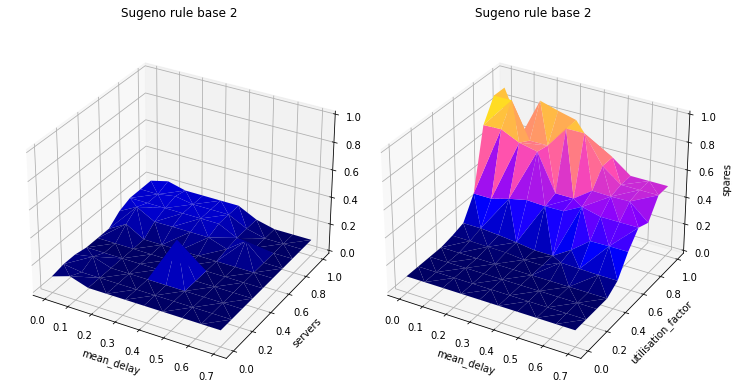

In [48]:
# Plotting surface
xs = []
ys = []
ws = []
zs = []
DIVs = 10
for x in linspace(0,0.7,DIVs):
    for y in linspace(0,1,DIVs):
        for w in linspace(0,1,DIVs):
            FS_s2.set_variable("mean_delay", x)
            FS_s2.set_variable("servers", y)
            FS_s2.set_variable("utilisation_factor", w)
            z = FS_s2.Sugeno_inference()['spares']
            xs.append(x)
            ys.append(y)
            ws.append(w)
            zs.append(z)
        
        
xs = array(xs)
ys = array(ys)
ws = array(ws)
zs = array(zs)

fig = plt.figure()
fig.set_size_inches(10, 20)

ax = fig.add_subplot(121, projection='3d')

xx, yy = plt.meshgrid(xs,ys)

ax.plot_trisurf(xs,ys,zs, vmin=0, vmax=1, cmap='gnuplot2')
ax.set_xlabel("mean_delay")
ax.set_ylabel("servers")
ax.set_zlabel("spares")
ax.set_title("Sugeno rule base 2", pad=20)
ax.set_zlim(0, 1)
plt.tight_layout()

bx = fig.add_subplot(122, projection='3d')

xx, yy = plt.meshgrid(xs,ws)

bx.plot_trisurf(xs,ws,zs, vmin=0, vmax=1, cmap='gnuplot2')
bx.set_xlabel("mean_delay")
bx.set_ylabel("utilisation_factor")
bx.set_zlabel("spares")
bx.set_title("Sugeno rule base 2", pad=20)
bx.set_zlim(0, 1)
plt.tight_layout()

plt.show()